# <div style="text-align: center; background-color: white; font-family:Times New Roman; color: #180f3d; padding: 14px; line-height: 1;border-radius:20px"> **Dollars in Data: A Data-Driven Dive into Employee Salaries**</div>

# <div style="text-align: center; background-color: #180f3d; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px"> Data Pre-Processsing</div>

This study presents an analysis of employee salaries across different job roles, experience levels, and employment types. The analysis aims to provide insights into salary trends, relationships between variables, and potential predictors of salary.

In [53]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import nltk
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('/kaggle/input/employee-salaries-for-different-job-roles/ds_salaries.csv')
df_copy=df.copy()
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [55]:
df.shape

(607, 12)

In [56]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [57]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [58]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [59]:
# Replace 'EN' with 'Entry-level/Junior' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-level/Junior')

# Replace 'MI' with 'Mid-level/Intermediate' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-level/Intermediate')

# Replace 'SE' with 'Senior-level/Expert' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('SE', 'Senior-level/Expert')

# Replace 'EX' with 'Executive-level/Director' in the 'experience_level' column
df['experience_level'] = df['experience_level'].replace('EX', 'Executive-level/Director')

# <div style="text-align: center; background-color: #180f3d; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">Exploratory Data Analysis</div>

* Explored the distribution of salaries across job titles, experience levels, and employment types using box plots.
* Investigated relationships between variables such as remote work ratios, company sizes, and their impact on salaries.
* Identified potential correlations between average salary per job title/experience level and actual salaries.

**Median salary VS each work year**

In [60]:
monthly_trends = df.groupby('work_year')['salary_in_usd'].median().reset_index()


fig_monthly_trends = px.line(
    monthly_trends, 
    x='work_year',   # x-values: work years
    y='salary_in_usd',  # y-values: median salary
    labels={'work_year': 'Year'},  
    title='Yearly Salary Trends',  
    height=450
)

fig_monthly_trends.update_traces(line_color='black')
fig_monthly_trends.show()

**Salaries for each job title**

In [61]:
monthly_trends = df.groupby('job_title')['salary_in_usd'].sum().reset_index()


fig_monthly_trends = px.line(
    monthly_trends,  
    x='job_title',   # x-values: job titles
    y='salary_in_usd',  # y-values: sum of salaries
    labels={'job_title': 'Job'},  
    title='Salary Trends by Job', 
    height=800  
)

fig_monthly_trends.update_traces(line_color='black')
fig_monthly_trends.show()

**Job Distribution**

In [62]:
top10_job_title = df['job_title'].value_counts()[:10]

fig = px.bar(
    y=top10_job_title.values,  # y-values: count of each job title
    x=top10_job_title.index,   # x-values: job titles
    color=top10_job_title.index, 
    color_discrete_sequence=px.colors.sequential.Magma, 
    text=top10_job_title.values,  # Display the count values on top of the bars
    title='Top 10 Job Titles'
)

fig.update_layout(
    title_text='Job Distribution', 
    height=650,  
    xaxis_title="Job Titles",
    yaxis_title="Count"
)
fig.show()

**Experience level distribution**

In [63]:
fig2 = px.sunburst(df, path=['experience_level'], color_discrete_sequence=px.colors.sequential.Blackbody)
fig2.update_layout(title_text='Distribution of experience_level', height=300)
fig2.show()

**Salary Distribution with Company Size**

In [64]:
# x-axis: "company_size", y-axis: "salary_in_usd", color-coded by "experience_level"
fig = px.bar(df, x="company_size", y="salary_in_usd", color="experience_level",color_discrete_sequence=px.colors.sequential.Blackbody)

fig.update_layout(
    title_text='Salary Distribution with Company Size',  
    height=650, 
    xaxis_title="Company Size",
    yaxis_title="Salary"
)

fig.show()

**Average salary for each job title**

In [65]:
average_salary = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
average_salary = average_salary.sort_values(by='salary_in_usd', ascending=False)
top_10_expensive_salary = average_salary.head(10)

fig = px.bar(
    x=top_10_expensive_salary['job_title'],  # x-values: job titles
    y=top_10_expensive_salary['salary_in_usd'],# y-values: average salaries
    color_discrete_sequence=['black']
)

fig.update_layout(
    title='Top 10 Jobs by Salary', 
    xaxis_title='Job',  
    yaxis_title='Salary',  
    height=450
)

fig.show()

**Employment type distribution**

In [66]:
type_grouped = df['employment_type'].value_counts()
e_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(
    x=e_type, 
    y=type_grouped.values,  
    color=type_grouped.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,  
    template='plotly_dark',  
    text=type_grouped.values  
)

fig.update_layout(
    title_text='Employment Type Distribution',  
    height=400,  
    xaxis_title="Employment Type",  
    yaxis_title="Count"
)

fig.update_traces(width=0.5)
fig.show()

**Company size distribution**

In [67]:
size = df['company_size'].value_counts()

fig = px.bar(
    y=size.values, 
    x=size.index,   
    color=size.index,  
    color_discrete_sequence=px.colors.sequential.PuBuGn, 
    text=size.values, 
    title='Size of Company', 
    template='plotly_dark'  
)

fig.update_layout(
    xaxis_title="Company Size",  
    yaxis_title="Count"
)

fig.show()

**Top 10 Employee Residence**

In [68]:
top10_employee_residence = df['employee_residence'].value_counts()[:10]

fig = px.bar(
    y=top10_employee_residence.values,  
    x=top10_employee_residence.index,  
    color=top10_employee_residence.index, 
    color_discrete_sequence=px.colors.sequential.PuBuGn,  
    text=top10_employee_residence.values,  
    title='Top 10 Employee Residence', 
    template='plotly_dark' 
)
    
fig.update_layout(
    xaxis_title="Employee Residence",  
    yaxis_title="Count",  
)  

fig.show()

**Correlations between attributes**

In [69]:
from sklearn.preprocessing import LabelEncoder 

num_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for x in num_cols:  
    df[x] = le.fit_transform(df[x])

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0


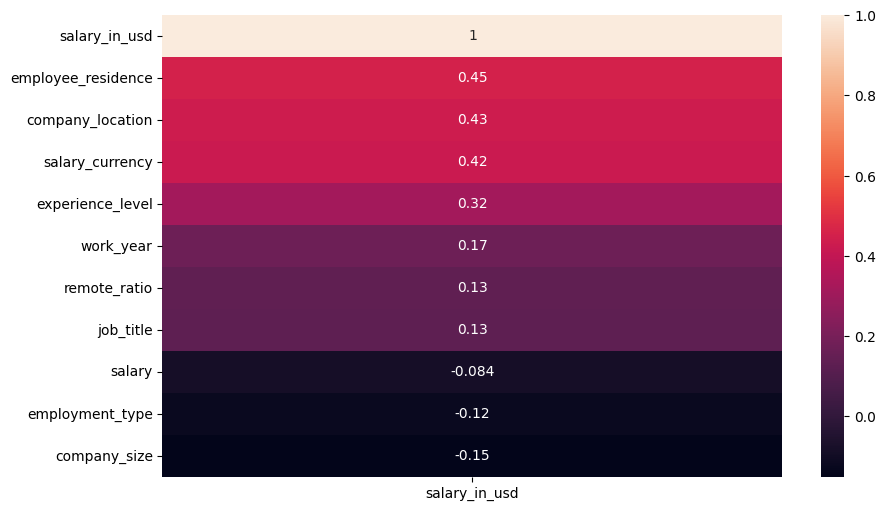

In [70]:
Corr_Matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(Corr_Matrix[['salary_in_usd']].sort_values(by='salary_in_usd', ascending=False), annot=True)
plt.show()

In [71]:
print('Top 5 Most Positively Correlated to the To salary_in_usd')
Corr_Matrix['company_location'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the To salary_in_usd


company_location      1.000000
employee_residence    0.897704
salary_currency       0.787084
salary_in_usd         0.428994
experience_level      0.247133
Name: company_location, dtype: float64

In [72]:
print('Top 5 Most Negatively Correlated to salary_in_usd ')
Corr_Matrix['salary_in_usd'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to salary_in_usd 


company_size      -0.151205
employment_type   -0.123545
salary            -0.083906
job_title          0.131016
remote_ratio       0.132122
Name: salary_in_usd, dtype: float64

# <div style="text-align: center; background-color: #180f3d; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">Feature Engineering and Predictive Analysis</div>

Built models to predict salaries based on the engineered features and evaluated the model's performance using Mean Squared Error

In [73]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [74]:
X = df.drop(columns=['salary_in_usd','salary'])
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (485, 9)
X_test shape: (122, 9)
y_train shape: (485,)
y_test shape: (122,)


In [75]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual_salary'] = y_test
    submit['Predict_salary'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__
    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Random Forest:
R2 Score: 0.55
Mean Absolute Error (MAE): 27695.11
Root Mean Squared Error (RMSE): 41378.86
   index  Actual_salary  Predict_salary
0    563         140250   140657.548354
1    289         135000   140657.548354
2     76         100000   131251.773810
3     78         270000   227283.060000
4    182          26005    51867.950000
----------------------------------------
Gradient Boosting:
R2 Score: 0.57
Mean Absolute Error (MAE): 27073.95
Root Mean Squared Error (RMSE): 40598.22
   index  Actual_salary  Predict_salary
0    563         140250   151892.104458
1    289         135000   151892.104458
2     76         100000   112695.232476
3     78         270000   192510.304903
4    182          26005    43320.012885
----------------------------------------
The best performing model is: GradientBoostingRegressor with accuracy: 0.57


employee_residence: 0.41
job_title: 0.30
experience_level: 0.16
salary_currency: 0.04
company_size: 0.03
work_year: 0.02
company_location: 0.02
remote_ratio: 0.01
employment_type: 0.00


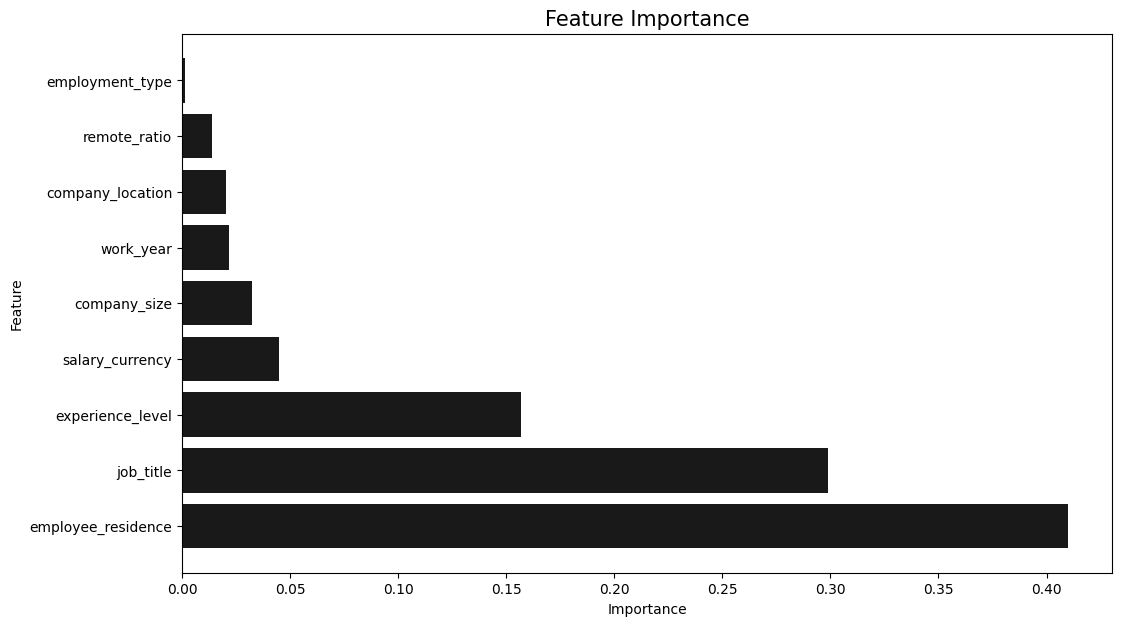

In [76]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.2f}")

plt.figure(figsize=(12, 7))
plt.barh(*zip(*sorted_feature_importance), alpha=0.9, color='black')
plt.title('Feature Importance', fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

* The analysis revealed significant variations in salaries across different job titles and experience levels. Employee residence tend to have higher average salaries.

* Remote work percentages and employment type (full-time, part-time, contract) appeared to have limited impact on salary levels.

* The predictive model demonstrated a reasonable performance in forecasting salaries, though further refinement may be necessary for higher accuracy

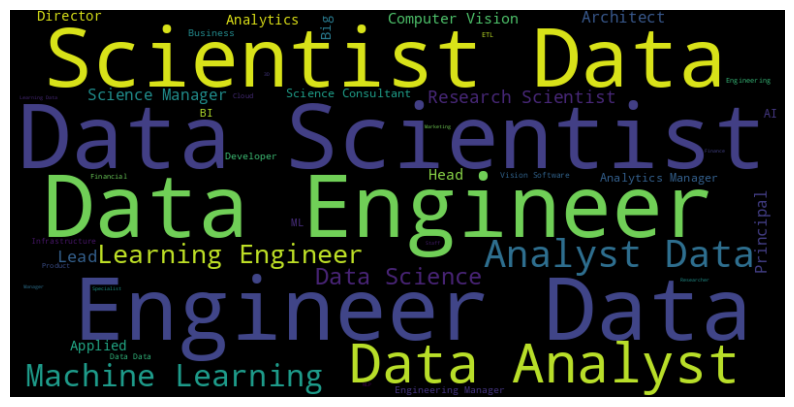

In [77]:
from wordcloud import WordCloud

text_data = df_copy['job_title']
all_text = ' '.join(text_data)
wordcloud = WordCloud(width=800, height=400).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()